<a href="https://colab.research.google.com/github/Anku192/AIML-class/blob/main/ML_Lab_Experiment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab Experiment 05
**Objective:** Implement SVM to perform classification.
<hr>


Link for reference: https://greitemann.dev/svm-demo

#### 🧑‍🎓 Student Details

| Field                | Information                |
|---------------------|----------------------------|
| 👨‍🎓 **Name**            | _[Enter Your Full Name]_     |
| 🆔 **USN**              | _[Enter Your USN]_           |
| **Section**        | _[Enter Your Section]_ |
| **Programme**   | B.Tech(H)             |
| **School**  | Computer Science and Engineering |


In [ ]:
import platform
import psutil
from datetime import datetime
import sys
import getpass
import os

# Timestamp
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
# System Information
system_info = {
    "User Name": getpass.getuser(),
    "Timestamp": timestamp,
    "OS": platform.system() + " " + platform.release(),
    "Processor": platform.processor(),
    "RAM (GB)": round(psutil.virtual_memory().total / (1024 ** 3), 2),
    "Python Version": platform.python_version(),
    "Working Directory": os.getcwd()
}
# Print formatted results
print("🧑‍💻 System Details\n" + "-"*40)
for key, value in system_info.items():
    print(f"{key:20}: {value}")


### Student Tasks
<hr>

##### Learning Objectives
1. Understand the fundamentals of Support Vector Machine (SVM) classification and its applications
2.	Implement SVM using scikit-learn library with different kernel functions
3.	Analyze the impact of kernel types (linear, RBF, polynomial) on classification performance
4.	Evaluate model performance using appropriate metrics and hyperparameter tuning
5.	Visualize decision boundaries and interpret SVM classification results

**Step 01:**
- Import pandas, numpy, scikit-learn, matplotlib, seaborn and other required libraries for Classification task.

In [12]:
# [ Edit this cell ] Write your code below this line and execute the cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib.colors import ListedColormap
# Set up matplotlib style
plt.style.use('seaborn-v0_8-whitegrid')

**Step 02:**
- Load the provided dataset (CSV format is recommended) using pandas and perform initial data exploration.

In [2]:
# [ Edit this cell ] Write your code below this line and execute the cell
iris = sns.load_dataset('iris')
df = iris.copy()

print("--- First 5 rows of the dataset ---")
print(df.head())
print("\s--- Dataset Information (Columns, Non-Null Counts, Dtypes) ---")
df.info()
print("\s---Descriptive Statistics ---")
print(df.describe())

--- First 5 rows of the dataset ---
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
\s--- Dataset Information (Columns, Non-Null Counts, Dtypes) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
\s---Descriptive Statistics ---
       sepal_length  sepal

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3047347647.py:7: SyntaxWarning: invalid escape sequence '\s'
  print("\s--- Dataset Information (Columns, Non-Null Counts, Dtypes) ---")
/tmp/ipython-input-3047347647.py:9: SyntaxWarning: invalid escape sequence '\s'
  print("\s---Descriptive Statistics ---")


**Step 03:**
- Perform Exploratory Data Analysis

In [3]:
# [ Edit this cell ] Write your code below this line and execute the cell
print(df.isnull().sum())
print(df['species'].unique())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
['setosa' 'versicolor' 'virginica']


**Step 04:**
- Data visualization and class balance analysis: Create visualizations to understand class distribution and feature relationships.

<Figure size 1000x800 with 0 Axes>

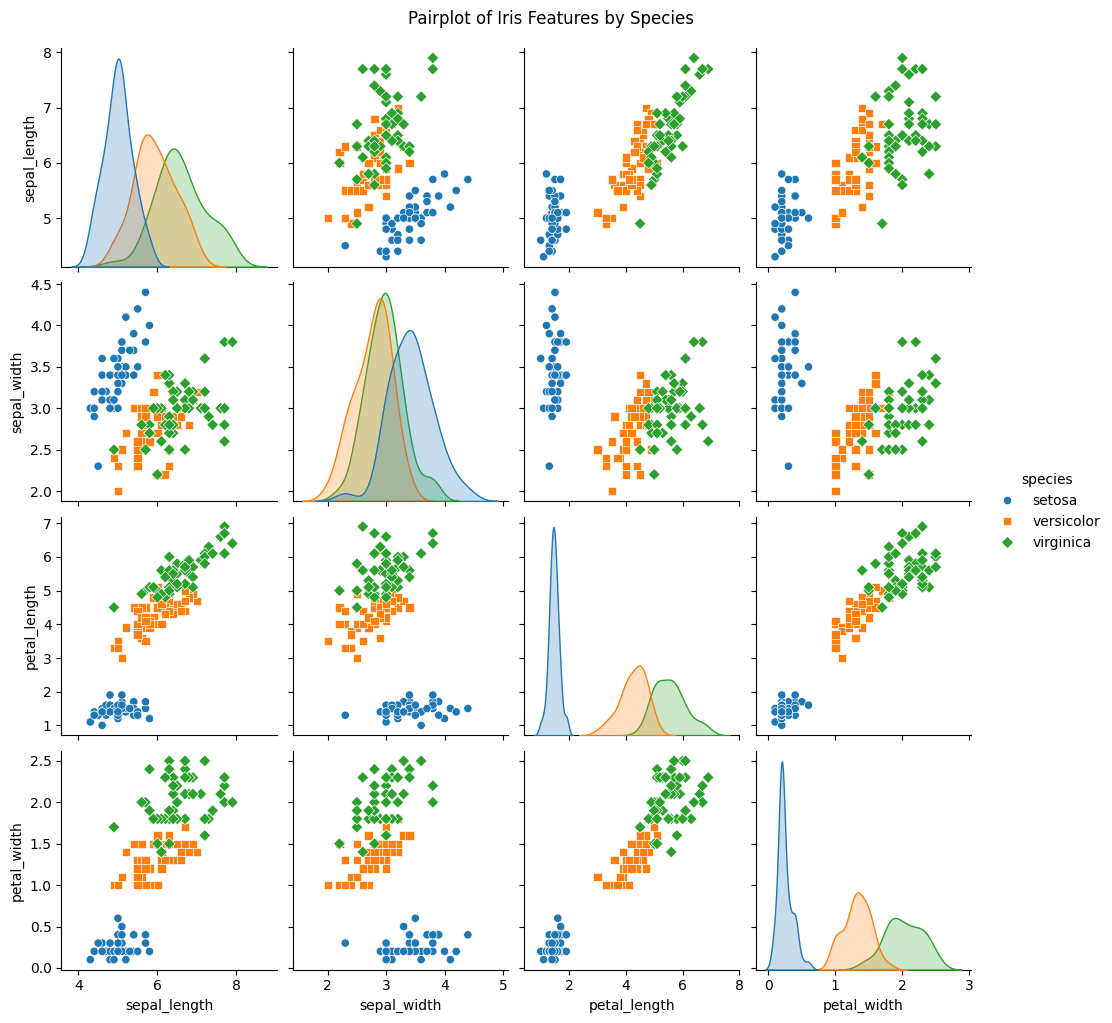

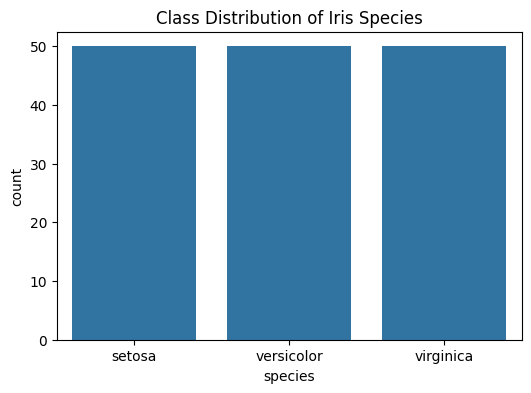

In [5]:
# [ Edit this cell ] Write your code below this line and execute the cell

plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()
# 2. Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df)
plt.title('Class Distribution of Iris Species')
plt.show()

**Step 05:**
- Data preprocessing and feature selection - Handle missing values, select relevant features, and prepare data for modeling.

In [13]:
# [ Edit this cell ] Write your code below this line and execute the cell
X = df.drop('species', axis=1) # Features are sepal_length, sepal_width,␣

y = df['species'] # Target variable
# Scaling the features
# Standard Scaler standardizes features by removing the mean and scaling to␣

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("--- First 5 rows of Scaled Features ---")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

--- First 5 rows of Scaled Features ---
   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444


**Step 06:**
- Split data into training and testing sets - Divide the dataset into training and testing portions for model validation.

In [14]:
# [ Edit this cell ] Write your code below this line and execute the cell
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 105 samples
Testing set size: 45 samples


**Step 07:**
-  Build and train SVM classification models - Create and train SVM classifiers with different kernels (linear, RBF, polynomial) using scikit-learn.

In [15]:
# [ Edit this cell ] Write your code below this line and execute the cell
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42, gamma='auto') # RBF (default)
svm_poly = SVC(kernel='poly', random_state=42, degree=3) # Polynomial degree 3
# Train the models
print("Training Linear SVM...")
svm_linear.fit(X_train, y_train)
print("Training RBF SVM...")
svm_rbf.fit(X_train, y_train)
print("Training Polynomial SVM...")
svm_poly.fit(X_train, y_train)
print("All SVM models trained successfully.")

Training Linear SVM...
Training RBF SVM...
Training Polynomial SVM...
All SVM models trained successfully.


**Step 08:**
- Model evaluation and performance metrics - Evaluate the model using appropriate classification metrics (accuracy, confusion matrix, classification report, etc.).

In [18]:
# [ Edit this cell ] Write your code below this line and execute the cell
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
"Linear SVM": svm_linear,
"RBF SVM": svm_rbf,
"Polynomial SVM": svm_poly
}
# Evaluate models
for name, model in models.items():
  y_pred = model.predict(X_test)
  print(f"\n--- Results for {name} ---")

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.4f}")
  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  print("\nConfusion Matrix:")
  print(cm)
  # Classification Report
  report = classification_report(y_test, y_pred, zero_division=0)
  print("\nClassification Report:")
  print(report)


--- Results for Linear SVM ---
Accuracy: 0.9111

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


--- Results for RBF SVM ---
Accuracy: 0.9111

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91     

**Step 09:**
- Visualize results and model interpretation - Visualize confusion matrix, decision boundaries (for 2D data), and interpret SVM model.

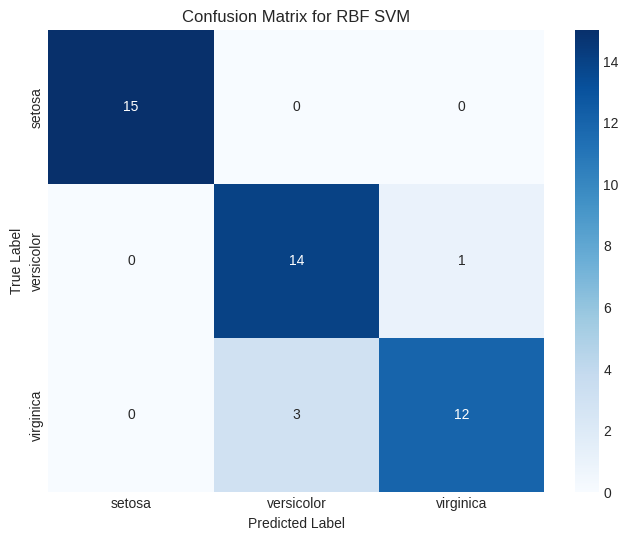

InvalidIndexError: (slice(None, None, None), 0)

In [22]:
# [ Edit this cell ] Write your code below this line and execute the cell
y_pred_rbf = svm_rbf.predict(X_test)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(
cm_rbf,
annot=True,
fmt='d',
cmap='Blues',
xticklabels=y.unique(),
yticklabels=y.unique()
)
plt.title('Confusion Matrix for RBF SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
X_2d = df[['petal_length', 'petal_width']]
y_2d = y
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
X_2d_scaled, y_2d, test_size=0.3, random_state=42, stratify=y_2d
)
# Train the RBF model on 2D data
svm_rbf_2d = SVC(kernel='rbf', random_state=42, gamma='auto')
svm_rbf_2d.fit(X_train_2d, y_train_2d)
# Function to plot decision boundary
def plot_decision_boundary(X, y, classifier, title):
    h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Get min/max values and create a meshgrid
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict on the meshgrid points
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Series(Z).map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values.reshape(xx.shape)
# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
y_map = pd.Series(y).map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_map, cmap=cmap_bold,
edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(title)
plt.xlabel('Scaled Petal Length')
plt.ylabel('Scaled Petal Width')
plt.legend(handles=scatter.legend_elements()[0], labels=y.unique())
plt.show()

plot_decision_boundary(
X_train_2d,
y_train_2d,
svm_rbf_2d,
'SVM RBF Decision Boundary (Petal Length vs. Petal Width)'
)


**Step 10:**
- Compare and Analysis of the result with KNN Classification ML Algorithm.

In [ ]:
# [ Edit this cell ] Write your code below this line and execute the cell


## Implement and train knn model

### Subtask:
Implement the KNN classifier using `scikit-learn`.

**Reasoning**:
Implement the KNN classifier using scikit-learn by importing the necessary class, instantiating the classifier, and fitting it to the training data.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN classifier with n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

print("KNN model trained successfully.")

KNN model trained successfully.


### ✅ Rubric: SVM (10 Marks)
<hr>

**For Course Instructor Use**

A rubric for accessing experiment focused on K-NN classification modeling and analysis.

| **Criteria**                     | **Description**                                                                                         | **Max Marks** | **Marks Obtained** |
|----------------------------------|---------------------------------------------------------------------------------------------------------|---------------|---------------------|
| **Data Loading & Exploration**  | Proper dataset loading, initial exploration.                   |      3        |                     |
| **Model Implementation and Model Implementation**         | Correct Correct implementation of SVM using scikit-learn; appropriate kernel selection and accurate calculation and interpretation of classification metrics (accuracy, confusion matrix, etc.).           |      3        |                     |
| **Visualization & Analysis**     | Effective visualizations of results, confusion matrix, decision boundaries, and interpretation of classifier’s behavior across different kernels. |      2        |                     |
| **Documentation & Viva Insight** | Brief comments, explanations, and ability to answer questions during viva on technique choices.         |      2        |                     |

**Marks Obtained: ______ / 10**

<hr>

**Course Instructor Signature:** ____________________      

##### Link for pandoc - Download the Software for export PDF for submission in GCR
https://github.com/jgm/pandoc/releases/tag/3.7.0.2

# Task
Implement, train, and evaluate a KNN classification model, then compare its performance to the previously trained SVM models.

## Implement and train knn model

### Subtask:
Implement the KNN classifier using `scikit-learn`.


**Reasoning**:
Implement the KNN classifier using scikit-learn by importing the necessary class, instantiating the classifier, and fitting it to the training data.



In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN classifier with n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

print("KNN model trained successfully.")

KNN model trained successfully.


## Predict and evaluate knn model

### Subtask:
Predict on the test set and evaluate the KNN model using the same metrics as the SVM models (accuracy, confusion matrix, classification report).


**Reasoning**:
Predict on the test set and evaluate the KNN model using accuracy, confusion matrix, and classification report.



In [24]:
# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Calculate and print accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"--- Results for KNN Model ---")
print(f"Accuracy: {accuracy_knn:.4f}")

# Generate and print Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:")
print(cm_knn)

# Generate and print Classification Report
report_knn = classification_report(y_test, y_pred_knn, zero_division=0)
print("\nClassification Report:")
print(report_knn)

--- Results for KNN Model ---
Accuracy: 0.9111

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

